In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS

### Loading the Data

In [2]:
df = pd.read_csv('dataset.csv', encoding='latin1')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1':'label', 'v2':'message'})
df.label.replace({'ham':0, 'spam':1}, inplace=True)

In [6]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### EDA

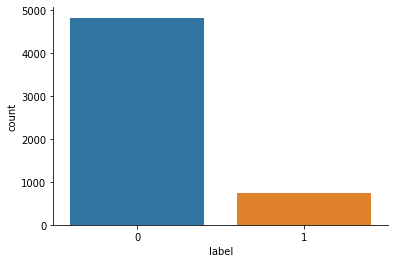

In [7]:
sns.countplot(data=df, x='label')
sns.despine()

In [8]:
df['len'] = df.apply(lambda x: len(x['message']), axis=1)
df['upper'] = df.apply(lambda x: sum(1 for letter in x['message'] if letter.isupper()), axis=1)
df['has_upper'] = df.apply(lambda x: 1 if x['upper'] > 0 else 0, axis=1)

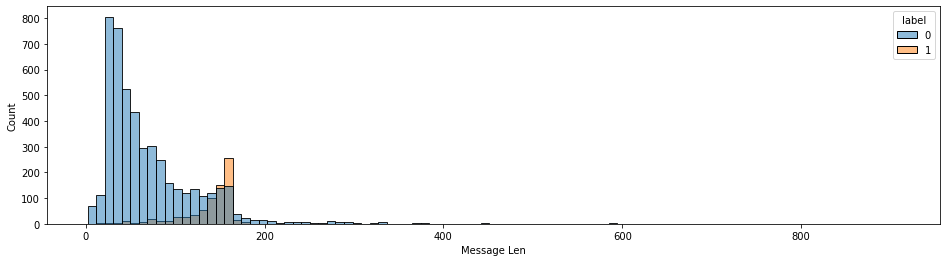

In [9]:
plt.figure(figsize=(16, 4))
sns.histplot(data=df, x='len', hue='label')
plt.xlabel('Message Len');

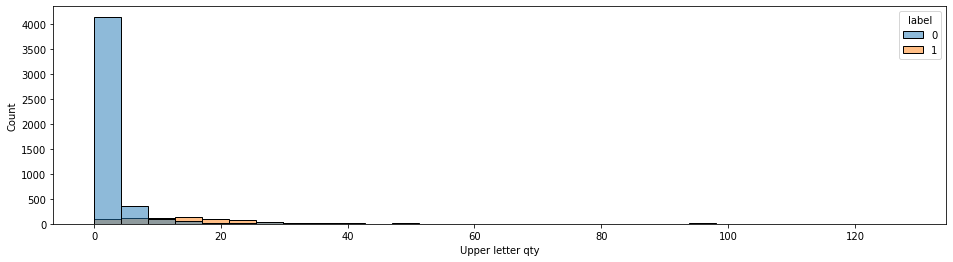

In [10]:
plt.figure(figsize=(16, 4))
sns.histplot(data=df, x='upper', hue='label', bins=30)
plt.xlabel('Upper letter qty');

<AxesSubplot:xlabel='label', ylabel='count'>

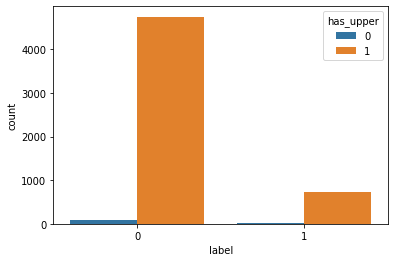

In [11]:
sns.countplot(data=df, x='label', hue='has_upper')

In [12]:
spam=df[df.label==1]
ham=df[df.label==0]

In [13]:
ham.describe()

,label,len,upper,has_upper
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,4.035026,0.984041
std,0.0,58.016023,10.110348,0.125328
min,0.0,2.000000,0.000000,0.000000
25%,0.0,33.000000,1.000000,1.000000
50%,0.0,52.000000,2.000000,1.000000
75%,0.0,92.000000,3.000000,1.000000
max,0.0,910.000000,127.000000,1.000000


In [14]:
ham.sort_values(by='len')[:10]

,label,message,len,upper,has_upper
4496,0,Ok,2,1,1
3049,0,Ok,2,1,1
5357,0,Ok,2,1,1
1924,0,Ok,2,1,1
5471,0,Yup,3,1,1
3374,0,:),3,0,0
1611,0,645,3,0,0
4012,0,Ok.,3,1,1
5268,0,\ER,3,2,1
3831,0,Ok.,3,1,1


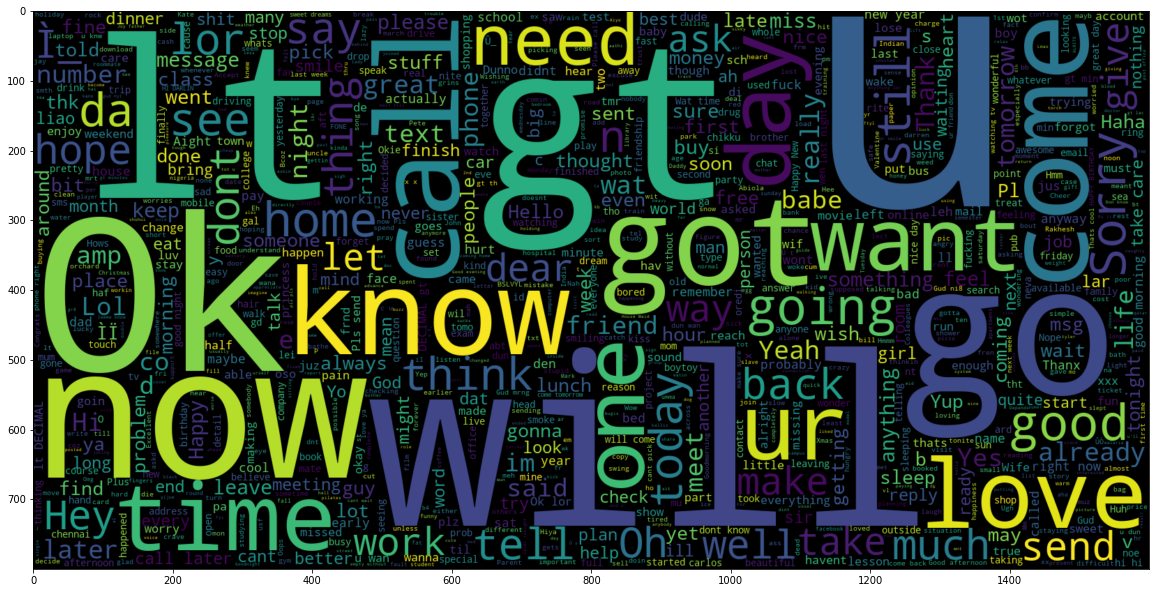

In [15]:
plt.figure(figsize = (20,20)) # Text that is not Spam
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(ham.message))
plt.imshow(wc , interpolation = 'bilinear')

In [16]:
spam.describe()

,label,len,upper,has_upper
count,747.0,747.000000,747.000000,747.00000
mean,1.0,138.866131,15.441767,0.98929
std,0.0,29.183082,12.304897,0.10300
min,1.0,13.000000,0.000000,0.00000
25%,1.0,132.500000,7.000000,1.00000
50%,1.0,149.000000,14.000000,1.00000
75%,1.0,157.000000,21.000000,1.00000
max,1.0,224.000000,128.000000,1.00000


In [17]:
spam.sort_values(by='len')[:10]

,label,message,len,upper,has_upper
3740,1,2/2 146tf150p,13,0,0
3979,1,ringtoneking 84484,18,0,0
2698,1,FROM 88066 LOST å£12 HELP,25,12,1
2078,1,85233 FREE>Ringtone!Reply REAL,30,10,1
2802,1,FreeMsg>FAV XMAS TONES!Reply REAL,33,19,1
2268,1,88066 FROM 88066 LOST 3POUND HELP,33,17,1
1776,1,Call FREEPHONE 0800 542 0578 now!,33,10,1
712,1,08714712388 between 10am-7pm Cost 10p,37,1,1
3300,1,RCT' THNQ Adrian for U text. Rgds Vatian,40,11,1
954,1,Filthy stories and GIRLS waiting for your,41,6,1


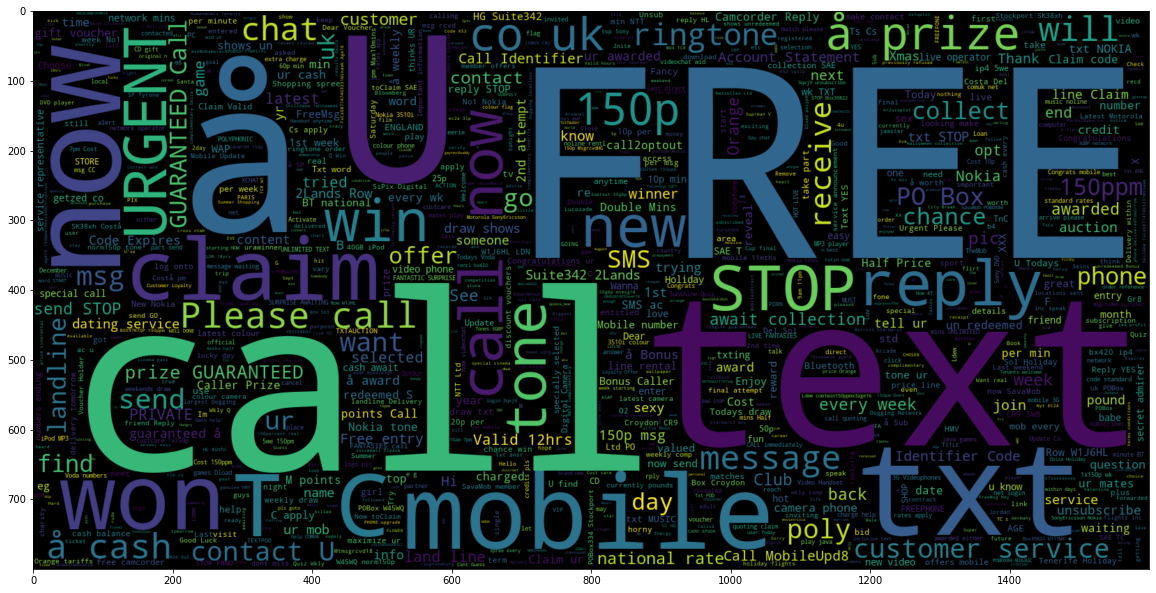

In [18]:
plt.figure(figsize = (20,20)) # Text that is not Spam
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(spam.message))
plt.imshow(wc , interpolation = 'bilinear')

### Text Processing

In [19]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Miguel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def clean(text):
  #lower text
  text = text.lower()
  #remove pontctuation
  text = ''.join([letter for letter in text if letter not in string.punctuation])
  #remove stop words
  text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])

  return text

In [23]:
df['cleaned_message'] = df['message'].apply(clean)

### Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.metrics import confusion_matrix , classification_report , f1_score , accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [28]:
def get_confusion_matrix(y_test, pred):
  unique_label = np.unique([y_test, pred])
  cmtx = pd.DataFrame(
      confusion_matrix(y_test, pred, labels=unique_label), 
      index=['true:{:}'.format(x) for x in unique_label], 
      columns=['pred:{:}'.format(x) for x in unique_label]
  )
  return cmtx

In [29]:
def evaluate(model, X_train, y_train, X_test, y_test):
  model = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  print( "F1 Score:" , f1_score(y_test, y_pred, average='macro' ) )
  print('\n', get_confusion_matrix(y_test, y_pred))
  return model

In [30]:
X = df['cleaned_message']
y = df['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42 , stratify = y)
print('Train Size {}'.format(X_train.shape[0]))
print('Test Size {}'.format(X_test.shape[0]))

Train Size 4457
Test Size 1115


In [32]:
count_vectorizer = CountVectorizer()
X_train_vector = count_vectorizer.fit_transform(X_train)
X_test_vector = count_vectorizer.transform(X_test)

In [33]:
lr = evaluate(LogisticRegression(max_iter=500), X_train_vector, y_train, X_test_vector, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

F1 Score: 0.9567175187298629

         pred:0  pred:1
true:0     966       0
true:1      21     128


In [34]:
dtree = evaluate(DecisionTreeClassifier(), X_train_vector, y_train, X_test_vector, y_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       966
           1       0.88      0.83      0.85       149

    accuracy                           0.96      1115
   macro avg       0.93      0.90      0.91      1115
weighted avg       0.96      0.96      0.96      1115

F1 Score: 0.9145287717778265

         pred:0  pred:1
true:0     949      17
true:1      26     123


In [35]:
rforest = evaluate(RandomForestClassifier(), X_train_vector, y_train, X_test_vector, y_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

F1 Score: 0.9317029845489487

         pred:0  pred:1
true:0     966       0
true:1      32     117


In [36]:
nb = evaluate(MultinomialNB(), X_train_vector, y_train, X_test_vector, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.97      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

F1 Score: 0.9598909321131543

         pred:0  pred:1
true:0     962       4
true:1      16     133


#### Balancing

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 101)
X_train_vector_resampled, y_train_resampled = smote.fit_resample(X_train_vector, y_train)

In [40]:
pd.Series(y_train_resampled).value_counts()

0    3859
1    3859
Name: label, dtype: int64

In [41]:
lr2 = evaluate(LogisticRegression(max_iter=500), X_train_vector_resampled, y_train_resampled, X_test_vector, y_test)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       966
           1       0.62      0.89      0.73       149

    accuracy                           0.91      1115
   macro avg       0.80      0.90      0.84      1115
weighted avg       0.93      0.91      0.92      1115

F1 Score: 0.8378420066840502

         pred:0  pred:1
true:0     883      83
true:1      16     133


In [42]:
dtree2 = evaluate(DecisionTreeClassifier(), X_train_vector_resampled, y_train_resampled, X_test_vector, y_test)

              precision    recall  f1-score   support

           0       0.98      0.88      0.92       966
           1       0.52      0.88      0.66       149

    accuracy                           0.88      1115
   macro avg       0.75      0.88      0.79      1115
weighted avg       0.92      0.88      0.89      1115

F1 Score: 0.789795081967213

         pred:0  pred:1
true:0     846     120
true:1      18     131


In [44]:
nb2 = evaluate(MultinomialNB(), X_train_vector_resampled, y_train_resampled, X_test_vector, y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.88      0.89      0.89       149

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115

F1 Score: 0.9345250431778929

         pred:0  pred:1
true:0     948      18
true:1      16     133


### Random Tests

In [64]:
message = 'abc 123'

msg = clean(message)
msg = count_vectorizer.transform([message])
print('Model 1 -> {}'.format(lr.predict_proba(msg)))
print('Model 2 -> {}'.format(lr2.predict_proba(msg)))
print('Model 3 -> {}'.format(nb.predict_proba(msg)))
print('Model 4 -> {}'.format(nb2.predict_proba(msg)))

Model 1 -> [[0.98490137 0.01509863]]
Model 2 -> [[0.27813316 0.72186684]]
Model 3 -> [[0.601962 0.398038]]
Model 4 -> [[0.32330707 0.67669293]]


### Export Model

In [52]:
import pickle

In [63]:
with open('nb.pkl', 'wb') as f:
    pickle.dump(nb, f)

In [54]:
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(count_vectorizer, f)  